# Generate pretty plots for aDDM models (zScored)

In [25]:
import glam
import pandas as pd
import numpy as np
import os.path

import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
import pymc3 as pm

In [27]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
np.random.seed(23) # from random.org

In [29]:
def genGazeRatio(trial_data,fixations_data):
    partNums = trial_data.parcode.unique()
    IAFixMatrix = []
    for i in partNums:
        
        PartIAFixMatrix= fixations_data.loc[fixations_data['parcode'] == i]
       
        trialNums = pd.unique(PartIAFixMatrix['trial'])
        for j in trialNums:
            PartTrialIAFixMatrix= PartIAFixMatrix.loc[(PartIAFixMatrix['trial'] == j )]
            # considering that IA 1 is left and IA 2 is right (IAs 3 and 0 are not fixated in the item)
                        
            # Sum left item
            LGazeTime = PartTrialIAFixMatrix.loc[PartTrialIAFixMatrix['fix_item'] == 1, 'fix_time'].sum() 
            # Sum right item
            RGazeTime = PartTrialIAFixMatrix.loc[PartTrialIAFixMatrix['fix_item'] == 2, 'fix_time'].sum()  
            
            LGaze = LGazeTime/(LGazeTime + RGazeTime)
            RGaze = RGazeTime/(LGazeTime + RGazeTime)
            
            IAFixMatrix.append([LGaze, RGaze]) 
   #     print ('finish part ' + str(i))
    
    IAFixDataFrame = pd.DataFrame(IAFixMatrix,columns=['gaze_0','gaze_1'])
    GLAM_output = pd.concat([trial_data, IAFixDataFrame], axis = 1)
    
    return GLAM_output

In [30]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
  #  fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.05, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [31]:
def logisticplot_all_scatter (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
  #  fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.scatter(data[xaxis], data[yaxis], color=modlowcol, linewidth=3, zorder=5)
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
   # sub.set_xticks((-5,-3,-1,1,3,5))
   # sub.set_yticks((0,0.25,0.5,0.75,1))
    #sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

# LIKE frame 

In [32]:
sufix = 'aDDMLike_zScore2'

simulation_data1 = pd.read_csv('aDDM_simulation_data/Like/simul_expdata_' + sufix + '.csv')
simulation_fix1 = pd.read_csv('aDDM_simulation_data/Like/simul_fixations_' + sufix + '.csv')

human_data1 = pd.read_csv('aDDM_simulation_data/Like/aDDM_expdata_FF2018_Like_zScore_31.csv')
human_fix1 = pd.read_csv('aDDM_simulation_data/Like/aDDM_Fix_FF2018_Like_YesBin_31.csv')

In [33]:
simulation_data1['DVal'] = simulation_data1.item_right - simulation_data1.item_left 
human_data1['DVal'] = human_data1.item_right - human_data1.item_left 

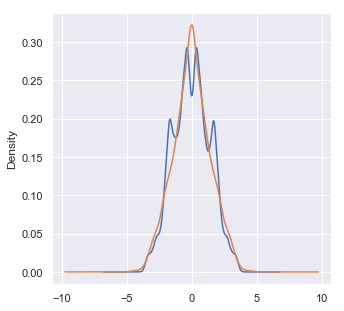

In [34]:
simulation_data1.DVal.plot.density()
human_data1.DVal.plot.density()


0.00577477685949975


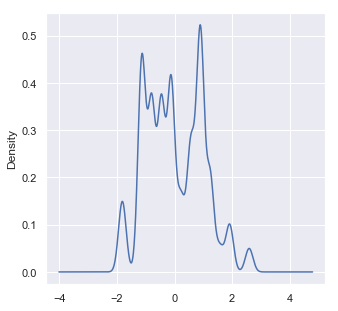

In [35]:
simulation_data1.item_left.plot.density()
print(simulation_data1.item_left.mean())

2.421599360701215e-16


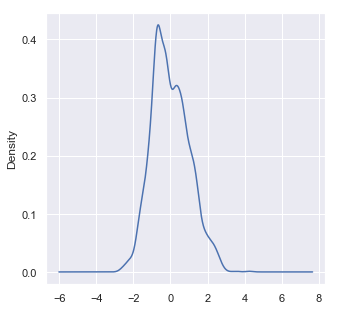

In [36]:
human_data1.item_left.plot.density()
print(human_data1.item_left.mean())

In [37]:
# save

if os.path.exists('aDDM_simulation_data/Like/predictions_'+sufix+'_GLAMformat.csv'):  
        aDDM_prediction = pd.read_csv('aDDM_simulation_data/Like/predictions_'+sufix+'_GLAMformat.csv')
        print('Loaded old file')
else:
        aDDM_prediction = genGazeRatio(simulation_data1,simulation_fix1)
        aDDM_prediction.to_csv('aDDM_simulation_data/Like/predictions_'+sufix+'_GLAMformat.csv')

Loaded old file


In [38]:
aDDM_human = genGazeRatio(human_data1,human_fix1)

In [39]:
# Change names of cols
aDDM_prediction = aDDM_prediction.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})
aDDM_human = aDDM_human.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})

## Picking only odd trials for humans

In [40]:
aDDM_human_even = aDDM_human.iloc[np.arange(0, len(aDDM_human), 2)].copy()

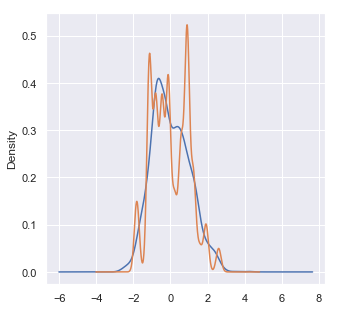

In [41]:
aDDM_human_even.item_value_0.plot.density()
aDDM_prediction.item_value_0.plot.density()

In [42]:
aDDM_prediction['DVal'] = aDDM_prediction.item_value_1 - aDDM_prediction.item_value_0 
aDDM_human_even['DVal'] = aDDM_human_even.item_value_1 - aDDM_human_even.item_value_0 

In [43]:
aDDM_human_even.head()

,Unnamed: 0,subject,rt,choice,trial,item_value_0,item_value_1,DVal,gaze_0,gaze_1
0,0,1,2009,-1,0,-0.898735,-1.237881,-0.339145,0.568396,0.431604
2,2,1,1700,1,2,-0.898735,1.814428,2.713164,0.446809,0.553191
4,4,1,1889,1,4,1.136137,1.814428,0.678291,0.529736,0.470264
6,6,1,4259,-1,6,0.796992,-1.916172,-2.713164,0.482254,0.517746
8,8,1,2548,-1,8,0.118701,-0.898735,-1.017436,0.528497,0.471503


In [44]:
aDDM_prediction.head()

,Unnamed: 0,subject,trial,rt,choice,item_value_0,item_value_1,gaze_0,gaze_1,DVal
0,0,0.0,0.0,5890.0,-1.0,1.237881,-1.136137,0.465753,0.534247,-2.374018
1,1,0.0,1.0,630.0,-1.0,1.237881,-1.136137,0.000000,1.000000,-2.374018
2,2,0.0,2.0,1470.0,-1.0,1.237881,-1.136137,0.441441,0.558559,-2.374018
3,3,0.0,3.0,10980.0,-1.0,1.237881,-1.136137,0.523316,0.476684,-2.374018
4,4,0.0,4.0,1910.0,-1.0,1.237881,-1.136137,0.610063,0.389937,-2.374018


Close Figure to continue...
5
5


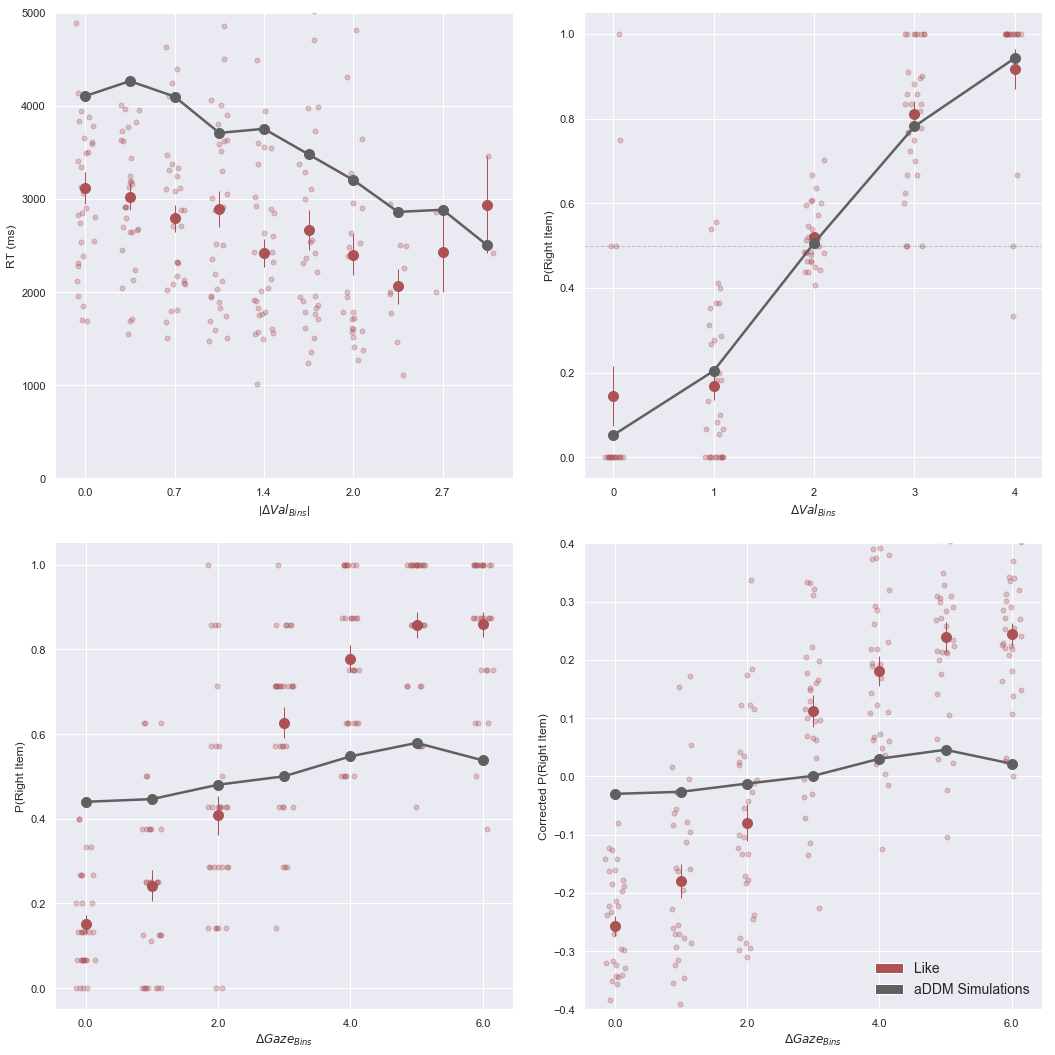

In [45]:
print('Close Figure to continue...')
#glam.plots_pretty_aDDM_zScored.plot_fit(aDDM_human_even, [aDDM_prediction], color_data = '#4F6A9A',label1 = 'Like');
glam.plots_pretty_aDDM_zScored.plot_fit(aDDM_human_even,[aDDM_prediction], color_data = '#AC5255',label1 = 'Like');

plt.savefig(str('SavedFigures/FF2018aDDM_simulations' + sufix + '.png'), dpi = 200 )
plt.show()

# extra test

---------------------------------------------------------
# DISLIKE frame 

---------------------------------------------------------
# DISLIKE frame Inverted

In [46]:
sufix = 'aDDMDislikeInv_zScore'
condition_folder= 'DislikeInv'

simulation_data1 = pd.read_csv('aDDM_simulation_data/'+condition_folder+'/simul_expdata_' + sufix + '.csv')
simulation_fix1 = pd.read_csv('aDDM_simulation_data/'+condition_folder+'/simul_fixations_' + sufix + '.csv')

human_data1 = pd.read_csv('aDDM_simulation_data/'+condition_folder+'/aDDM_expdata_FF2018_Dislike_zScore_31_Inv.csv')
human_fix1 = pd.read_csv('aDDM_simulation_data/'+condition_folder+'/aDDM_Fix_FF2018_Dislike_YesBin_31.csv')

In [47]:
simulation_data1['DVal'] = simulation_data1.item_right - simulation_data1.item_left 
human_data1['DVal'] = human_data1.item_right - human_data1.item_left 

In [48]:
# save in GLAM format the results from aDDM simulations

if os.path.exists('aDDM_simulation_data/'+condition_folder+'/predictions_'+sufix+'_GLAMformat.csv'):  
        aDDM_prediction = pd.read_csv('aDDM_simulation_data/'+condition_folder+'/predictions_'+sufix+'_GLAMformat.csv')
        print('Loaded old file')
else:
        aDDM_prediction = genGazeRatio(simulation_data1,simulation_fix1)
        aDDM_prediction.to_csv('aDDM_simulation_data/'+condition_folder+'/predictions_'+sufix+'_GLAMformat.csv')

Loaded old file


In [49]:
aDDM_human = genGazeRatio(human_data1,human_fix1)

In [50]:
# Change names of cols
aDDM_prediction = aDDM_prediction.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})
aDDM_human = aDDM_human.rename(index=str, columns={ 'parcode':'subject' ,"item_left": "item_value_0", "item_right": "item_value_1"})

## Picking only odd trials for humans

In [51]:
aDDM_human_even = aDDM_human.iloc[np.arange(0, len(aDDM_human), 2)].copy()

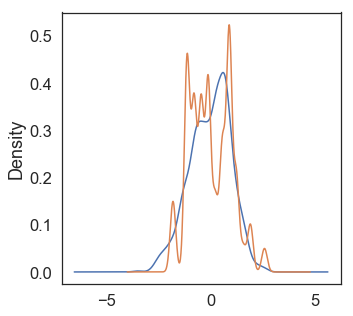

In [52]:
aDDM_human_even.item_value_0.plot.density()
aDDM_prediction.item_value_0.plot.density()

In [53]:
aDDM_prediction['DVal'] = aDDM_prediction.item_value_1 - aDDM_prediction.item_value_0 
aDDM_human_even['DVal'] = aDDM_human_even.item_value_1 - aDDM_human_even.item_value_0 

In [54]:
aDDM_human_even.head()

,Unnamed: 0,subject,rt,choice,trial,item_value_0,item_value_1,DVal,gaze_0,gaze_1
0,0,1,3327,1,0,1.237881,-1.136137,-2.374018e+00,0.745415,0.254585
2,2,1,3691,1,2,-0.457846,0.559590,1.017436e+00,0.330549,0.669451
4,4,1,6559,-1,4,-1.136137,-1.136137,-1.332268e-15,0.641717,0.358283
6,6,1,2470,1,6,-0.118701,0.898735,1.017436e+00,0.329730,0.670270
8,8,1,4669,1,8,-0.118701,-0.457846,-3.391455e-01,0.419431,0.580569


In [55]:
aDDM_prediction.head()

,Unnamed: 0,subject,trial,rt,choice,item_value_0,item_value_1,DVal,gaze_0,gaze_1
0,0,0.0,0.0,1270.0,1.0,1.237881,-1.136137,-2.374018,1.000000,0.000000
1,1,0.0,1.0,2680.0,-1.0,1.237881,-1.136137,-2.374018,0.456140,0.543860
2,2,0.0,2.0,3460.0,-1.0,1.237881,-1.136137,-2.374018,0.630952,0.369048
3,3,0.0,3.0,15580.0,-1.0,1.237881,-1.136137,-2.374018,0.510101,0.489899
4,4,0.0,4.0,2280.0,-1.0,1.237881,-1.136137,-2.374018,0.415094,0.584906


Close Figure to continue...
5
5


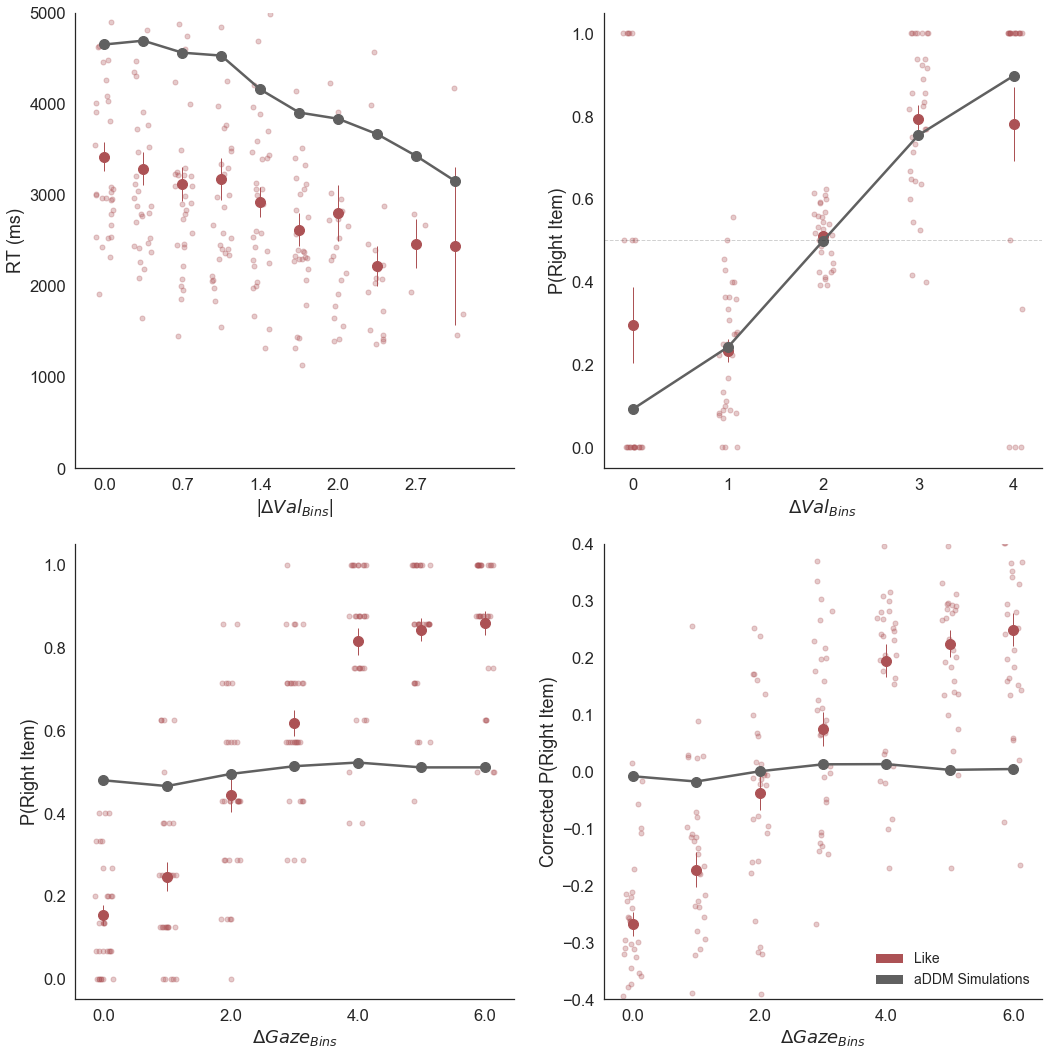

In [56]:
print('Close Figure to continue...')
#glam.plots_pretty_aDDM_zScored.plot_fit(aDDM_human_even, [aDDM_prediction], color_data = '#4F6A9A',label1 = 'Like');
glam.plots_pretty_aDDM_zScored.plot_fit(aDDM_human_even,[aDDM_prediction], color_data = '#AC5255',label1 = 'Like');

plt.savefig(str('SavedFigures/FF2018aDDM_simulations' + sufix + '.png'), dpi = 200 )
plt.show()